In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("train_insurance.csv")
test_data = pd.read_csv("test_insurance.csv")

In [3]:
train_data.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238,12000,0,0,0,1,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,92099,6000,1,0,0,1,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122,15000,0,0,1,0,Sedan


In [4]:
test_data.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,303713,16-25,male,10-19y,high school,middle class,0.424958,1,before 2015,1,0,10238,13000,0,0,0,Sports Car
1,141107,16-25,male,20-29y,high school,working class,0.503478,0,before 2015,1,1,10238,14000,0,0,0,SUV
2,447316,26-39,female,20-29y,high school,upper class,0.252246,1,before 2015,1,0,10238,10000,0,0,0,HatchBack
3,196066,16-25,female,20-29y,university,middle class,0.464749,1,before 2015,1,1,10238,7000,0,1,0,SUV
4,179947,16-25,male,20-29y,high school,working class,0.452968,1,after 2015,0,1,10238,13000,1,0,0,SUV


In [5]:
train_data.shape

(87285, 18)

In [6]:
test_data.shape

(17715, 17)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87285 entries, 0 to 87284
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87285 non-null  int64  
 1   AGE                  87285 non-null  object 
 2   GENDER               87285 non-null  object 
 3   DRIVING_EXPERIENCE   87285 non-null  object 
 4   EDUCATION            87285 non-null  object 
 5   INCOME               87285 non-null  object 
 6   CREDIT_SCORE         87285 non-null  float64
 7   VEHICLE_OWNERSHIP    87285 non-null  int64  
 8   VEHICLE_YEAR         87285 non-null  object 
 9   MARRIED              87285 non-null  int64  
 10  CHILDREN             87285 non-null  int64  
 11  POSTAL_CODE          87285 non-null  int64  
 12  ANNUAL_MILEAGE       87285 non-null  int64  
 13  SPEEDING_VIOLATIONS  87285 non-null  int64  
 14  DUIS                 87285 non-null  int64  
 15  PAST_ACCIDENTS       87285 non-null 

In [8]:
train_data.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

In [9]:
train_data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000
mean,394798.841554,0.602053,0.827760,0.584969,0.519746,18036.278192,11056.424357,0.679395,0.129633,0.546417,0.422959
std,279746.732730,0.137898,0.377591,0.492730,0.499613,16724.517018,2977.057974,1.388733,0.589598,1.397537,0.494032
min,101.000000,0.074401,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,156345.000000,0.514841,1.000000,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
50%,353756.000000,0.600938,1.000000,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000,0.000000
75%,598618.000000,0.703000,1.000000,1.000000,1.000000,22320.000000,13000.000000,1.000000,0.000000,0.000000,1.000000
max,999976.000000,0.954075,1.000000,1.000000,1.000000,92101.000000,21000.000000,20.000000,6.000000,15.000000,1.000000


In [10]:
cat_col = []
num_col = []
for i in train_data.columns:
    if train_data[i].dtypes == "object":
        cat_col.append(i)
    else:
        num_col.append(i)

In [11]:
cat_col

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_YEAR',
 'TYPE_OF_VEHICLE']

In [12]:
num_col

['ID',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

In [13]:
train_data[['ID',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']].head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,816393,0.638050,0,0,0,37379,11000,0,0,0,0
1,251762,0.475741,1,1,0,10238,9000,0,0,0,1
2,481952,0.839817,1,1,1,10238,12000,0,0,0,1
3,3506,0.682527,1,0,1,92099,6000,1,0,0,1
4,498013,0.572184,1,1,1,32122,15000,0,0,1,0


In [14]:
train_data[['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_YEAR',
 'TYPE_OF_VEHICLE']].head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,TYPE_OF_VEHICLE
0,40-64,female,20-29y,university,middle class,after 2015,Sports Car
1,26-39,male,20-29y,high school,middle class,before 2015,HatchBack
2,40-64,male,20-29y,none,middle class,before 2015,Sedan
3,40-64,male,20-29y,high school,upper class,before 2015,Sedan
4,40-64,female,20-29y,none,working class,after 2015,Sedan


<Axes: >

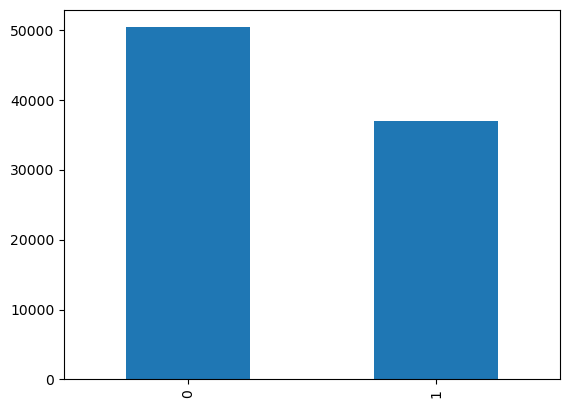

In [15]:
train_data['OUTCOME'].value_counts().plot(kind = 'bar')

<Axes: >

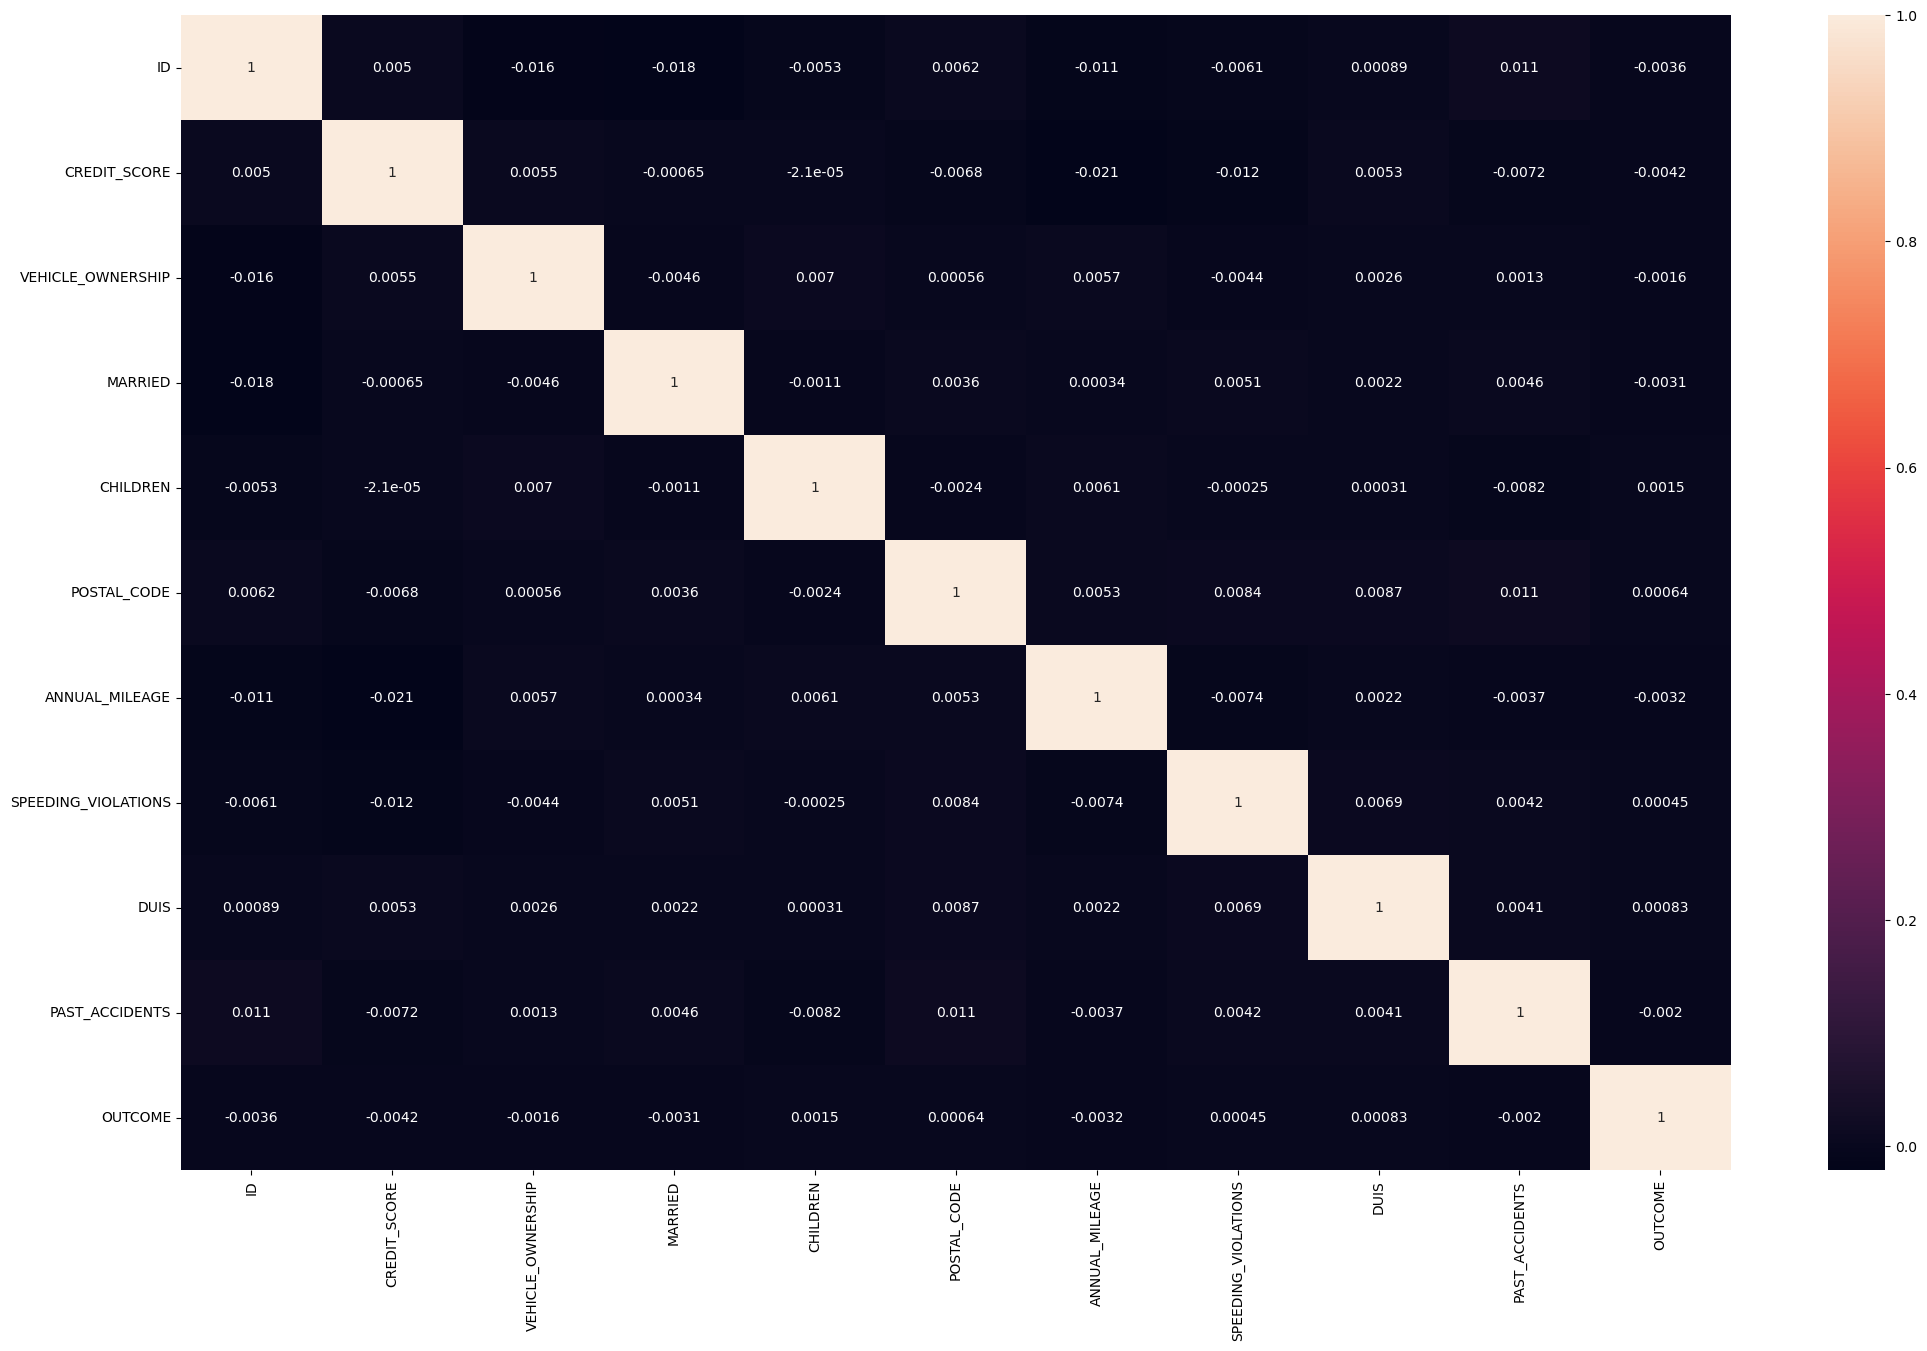

In [16]:
plt.figure(figsize = (25,15))
sns.heatmap(train_data.corr(),annot = True)

# OUTLIER CHECKING AND TREATMENT

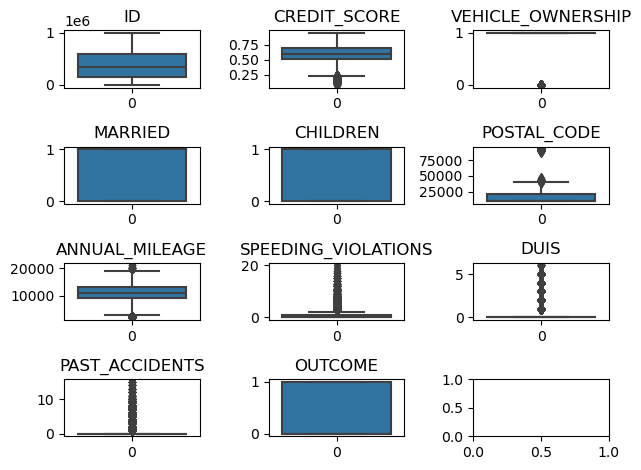

In [17]:
fig, ax = plt.subplots(4,3)
for variable, i in zip(num_col,ax.flatten()):
    boxplot = sns.boxplot(train_data[variable],ax = i)
    boxplot.set_title(variable)
    plt.tight_layout()
plt.show()

# ENCODING

In [18]:
train_data['AGE'].unique()

array(['40-64', '26-39', '16-25', '65+'], dtype=object)

In [19]:
train_data['DRIVING_EXPERIENCE'].unique()

array(['20-29y', '30y+', '0-9y', '10-19y'], dtype=object)

In [20]:
train_data['EDUCATION'].unique()

array(['university', 'high school', 'none'], dtype=object)

In [21]:
train_data['TYPE_OF_VEHICLE'].unique()

array(['Sports Car', 'HatchBack', 'Sedan', 'SUV'], dtype=object)

In [22]:
dummy = pd.get_dummies(train_data[['AGE','DRIVING_EXPERIENCE','EDUCATION','TYPE_OF_VEHICLE']],drop_first = True)

In [23]:
cat_col

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_YEAR',
 'TYPE_OF_VEHICLE']

In [24]:
type(dummy)

pandas.core.frame.DataFrame

In [25]:
type(num_col)

list

In [26]:
dummy.head()

,AGE_26-39,AGE_40-64,AGE_65+,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,0,1,0,0,1,0,0,1,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,1,0
3,0,1,0,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,1,0,0,1,0


In [27]:
train_data['VEHICLE_YEAR'].unique()

array(['after 2015', 'before 2015'], dtype=object)

In [28]:
train_data['GENDER'].unique()

array(['female', 'male'], dtype=object)

In [29]:
le = LabelEncoder()
train_data['GENDER'] = le.fit_transform(train_data[['GENDER']])

In [30]:
le = LabelEncoder()
train_data['VEHICLE_YEAR'] = le.fit_transform(train_data[['VEHICLE_YEAR']])

In [31]:
train_data[['GENDER','VEHICLE_YEAR']].head()

,GENDER,VEHICLE_YEAR
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


In [32]:
train_data['INCOME'].unique()

array(['middle class', 'upper class', 'working class', 'poverty'],
      dtype=object)

In [33]:
oe = OrdinalEncoder(categories = [["poverty","working class","middle class","upper class"]])
train_data['INCOME'] = oe.fit_transform(train_data[['INCOME']])

In [34]:
train_data['INCOME'].head()

0    2.0
1    2.0
2    2.0
3    3.0
4    1.0
Name: INCOME, dtype: float64

In [35]:
train_data.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,0,20-29y,university,2.0,0.638050,0,0,0,0,37379,11000,0,0,0,0,Sports Car
1,251762,26-39,1,20-29y,high school,2.0,0.475741,1,1,1,0,10238,9000,0,0,0,1,HatchBack
2,481952,40-64,1,20-29y,none,2.0,0.839817,1,1,1,1,10238,12000,0,0,0,1,Sedan
3,3506,40-64,1,20-29y,high school,3.0,0.682527,1,1,0,1,92099,6000,1,0,0,1,Sedan
4,498013,40-64,0,20-29y,none,1.0,0.572184,1,0,1,1,32122,15000,0,0,1,0,Sedan


In [36]:
train_data[num_col]

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,816393,0.638050,0,0,0,37379,11000,0,0,0,0
1,251762,0.475741,1,1,0,10238,9000,0,0,0,1
2,481952,0.839817,1,1,1,10238,12000,0,0,0,1
3,3506,0.682527,1,0,1,92099,6000,1,0,0,1
4,498013,0.572184,1,1,1,32122,15000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
87280,519523,0.564162,1,1,1,30026,13000,0,0,0,1
87281,220017,0.628189,1,1,1,10238,7000,0,0,0,0
87282,465121,0.672934,1,0,1,10238,7000,2,0,0,1
87283,602975,0.630619,1,1,0,33347,12000,0,0,0,0


In [37]:
final_train_data = pd.concat([train_data[num_col],dummy,train_data[['GENDER','VEHICLE_YEAR','INCOME']]], axis = 1)
final_train_data.head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,...,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car,GENDER,VEHICLE_YEAR,INCOME
0,816393,0.638050,0,0,0,37379,11000,0,0,0,...,1,0,0,1,0,0,1,0,0,2.0
1,251762,0.475741,1,1,0,10238,9000,0,0,0,...,1,0,0,0,0,0,0,1,1,2.0
2,481952,0.839817,1,1,1,10238,12000,0,0,0,...,1,0,1,0,0,1,0,1,1,2.0
3,3506,0.682527,1,0,1,92099,6000,1,0,0,...,1,0,0,0,0,1,0,1,1,3.0
4,498013,0.572184,1,1,1,32122,15000,0,0,1,...,1,0,1,0,0,1,0,0,0,1.0


In [38]:
final_train_data.drop(['ID','POSTAL_CODE'],axis = 1, inplace = True)

In [39]:
final_train_data.shape

(87285, 23)

# TRAIN TEST SPLIT

In [40]:
X = final_train_data.drop('OUTCOME', axis = 1)
y = final_train_data['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
print("X train :",X_train.shape)
print("X test :",X_test.shape)
print("y train :",y_train.shape)
print("y test :",y_test.shape)

X train : (61099, 22)
X test : (26186, 22)
y train : (61099,)
y test : (26186,)


# LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression

logreg_result = LogisticRegression()
logreg_result.fit(X_train, y_train)

LogisticRegression()

In [42]:
def performance(y,X,model):
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
    y_pred = model.predict(X)
    ypred_prob = model.predict_proba(X)[:,1]
    cm = confusion_matrix(y,y_pred)
    sns.heatmap(cm,annot = True)
    print(classification_report(y,y_pred))
    print("AUC score :",roc_auc_score(y,ypred_prob))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     35301
           1       0.00      0.00      0.00     25798

    accuracy                           0.58     61099
   macro avg       0.29      0.50      0.37     61099
weighted avg       0.33      0.58      0.42     61099

AUC score : 0.5031302580778514


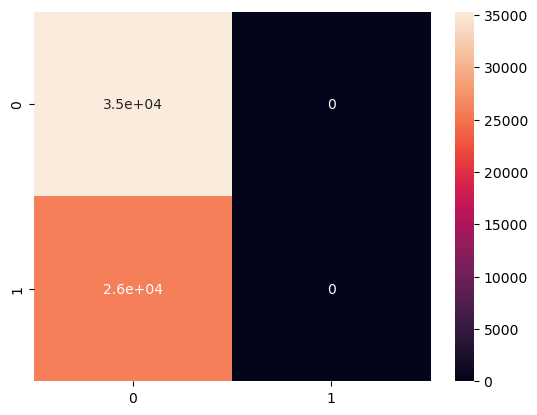

In [43]:
performance(y_train,X_train,logreg_result)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     15066
           1       0.00      0.00      0.00     11120

    accuracy                           0.58     26186
   macro avg       0.29      0.50      0.37     26186
weighted avg       0.33      0.58      0.42     26186

AUC score : 0.49624357861381146


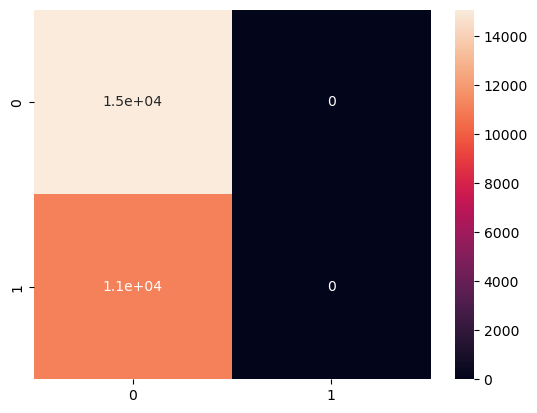

In [44]:
performance(y_test,X_test,logreg_result)

# DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train,y_train)
dt_model

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35301
           1       1.00      1.00      1.00     25798

    accuracy                           1.00     61099
   macro avg       1.00      1.00      1.00     61099
weighted avg       1.00      1.00      1.00     61099

AUC score : 1.0


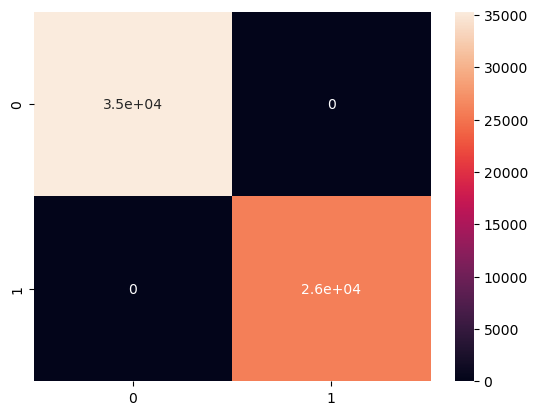

In [46]:
performance(y_train,X_train,dt_model)

              precision    recall  f1-score   support

           0       0.57      0.56      0.57     15066
           1       0.42      0.43      0.43     11120

    accuracy                           0.51     26186
   macro avg       0.50      0.50      0.50     26186
weighted avg       0.51      0.51      0.51     26186

AUC score : 0.496158395863954


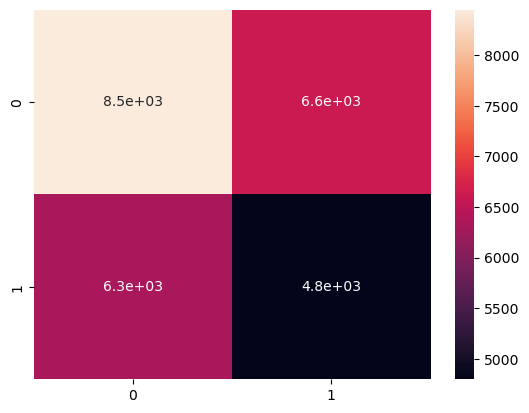

In [47]:
performance(y_test,X_test,dt_model)

# KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.77      0.82      0.80     35301
           1       0.73      0.66      0.70     25798

    accuracy                           0.76     61099
   macro avg       0.75      0.74      0.75     61099
weighted avg       0.75      0.76      0.75     61099

AUC score : 0.8137640992590366


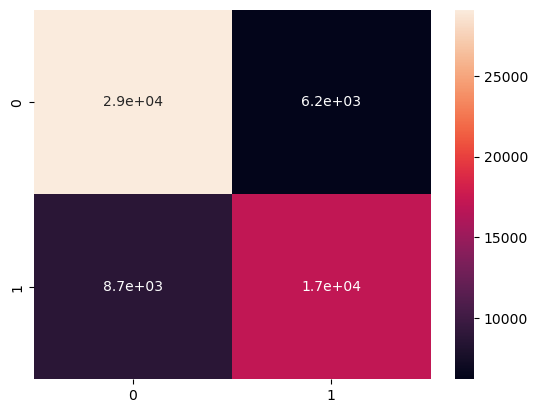

In [49]:
performance(y_train,X_train,knn_model)

              precision    recall  f1-score   support

           0       0.58      0.62      0.60     15066
           1       0.43      0.38      0.40     11120

    accuracy                           0.52     26186
   macro avg       0.50      0.50      0.50     26186
weighted avg       0.51      0.52      0.51     26186

AUC score : 0.50455686824495


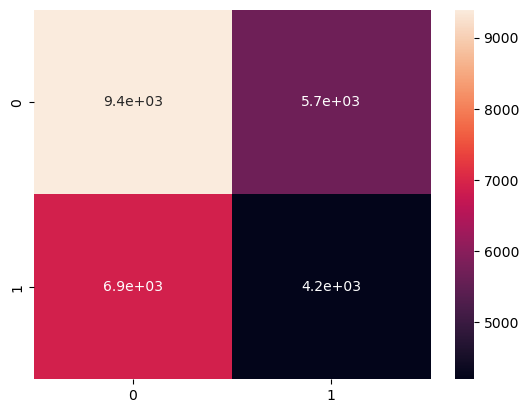

In [50]:
performance(y_test,X_test,knn_model)

# NAIVE BAYES

In [51]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train,y_train)
gnb_model

GaussianNB()

              precision    recall  f1-score   support

           0       0.58      0.97      0.72     35301
           1       0.44      0.03      0.06     25798

    accuracy                           0.57     61099
   macro avg       0.51      0.50      0.39     61099
weighted avg       0.52      0.57      0.45     61099

AUC score : 0.5140334768735654


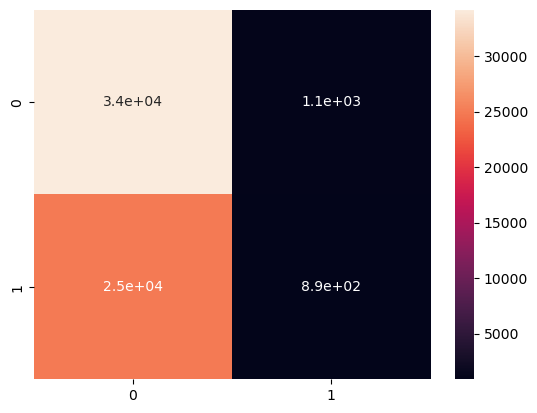

In [52]:
performance(y_train,X_train,gnb_model)

              precision    recall  f1-score   support

           0       0.57      0.97      0.72     15066
           1       0.41      0.03      0.06     11120

    accuracy                           0.57     26186
   macro avg       0.49      0.50      0.39     26186
weighted avg       0.51      0.57      0.44     26186

AUC score : 0.5012829282571554


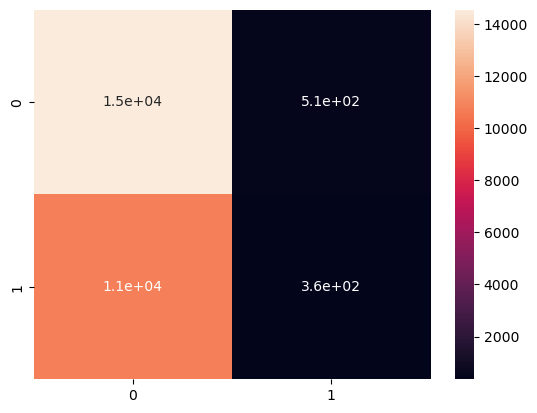

In [53]:
performance(y_test,X_test,gnb_model)

# RANDOM FOREST

In [54]:
rf_classification = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model = rf_classification.fit(X_train,y_train)
rf_model

RandomForestClassifier(n_estimators=10, random_state=10)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     35301
           1       1.00      0.95      0.97     25798

    accuracy                           0.98     61099
   macro avg       0.98      0.98      0.98     61099
weighted avg       0.98      0.98      0.98     61099

AUC score : 0.9988149679471572


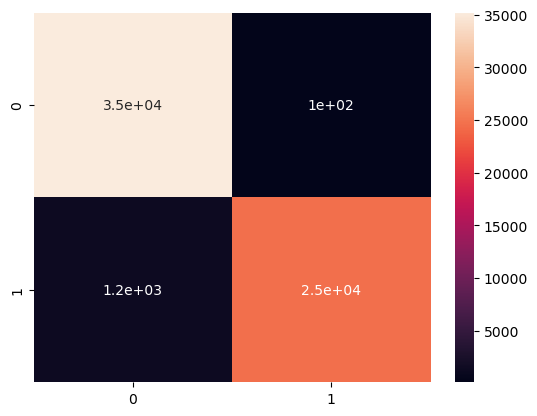

In [55]:
performance(y_train,X_train,rf_model)

              precision    recall  f1-score   support

           0       0.58      0.76      0.65     15066
           1       0.43      0.25      0.31     11120

    accuracy                           0.54     26186
   macro avg       0.50      0.50      0.48     26186
weighted avg       0.51      0.54      0.51     26186

AUC score : 0.5010588900444759


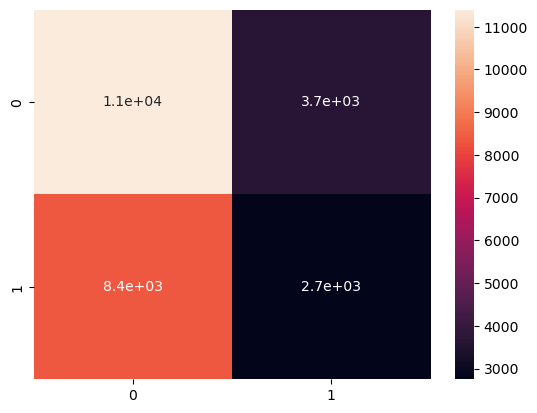

In [56]:
performance(y_test,X_test,rf_model)

# ADABOOST

In [57]:
ada_classification = AdaBoostClassifier(n_estimators=20, random_state=10)
ada_model = ada_classification.fit(X_train,y_train)
ada_model 

AdaBoostClassifier(n_estimators=20, random_state=10)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     35301
           1       0.65      0.00      0.00     25798

    accuracy                           0.58     61099
   macro avg       0.61      0.50      0.37     61099
weighted avg       0.61      0.58      0.42     61099

AUC score : 0.5215747958736903


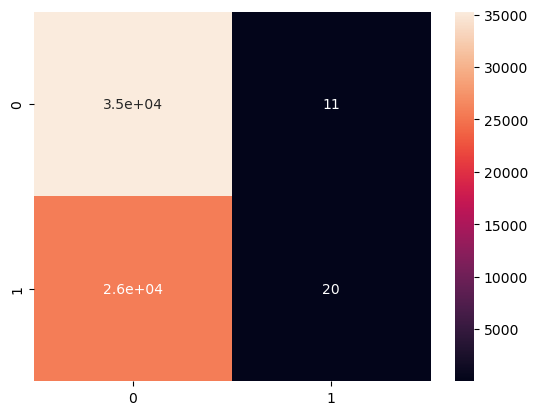

In [58]:
performance(y_train,X_train,ada_model)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     15066
           1       0.30      0.00      0.00     11120

    accuracy                           0.58     26186
   macro avg       0.44      0.50      0.37     26186
weighted avg       0.46      0.58      0.42     26186

AUC score : 0.5079889881404315


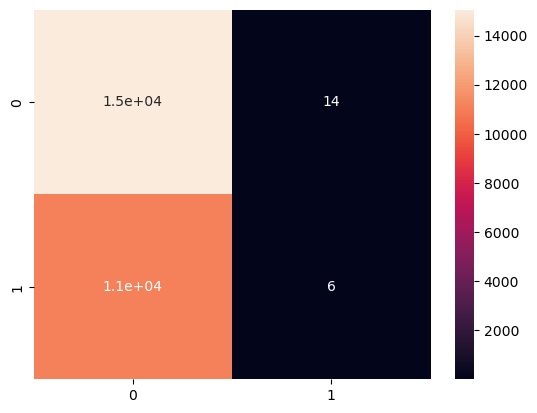

In [59]:
performance(y_test,X_test,ada_model)

# GRADIENTBOOSTING

In [60]:
gboost_model = GradientBoostingClassifier(n_estimators=30, max_depth= 10, learning_rate= 0.01, random_state=10)
gboost_model.fit(X_train,y_train)
gboost_model

GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=30,
                           random_state=10)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     35301
           1       1.00      0.01      0.02     25798

    accuracy                           0.58     61099
   macro avg       0.79      0.50      0.38     61099
weighted avg       0.76      0.58      0.43     61099

AUC score : 0.6350315992332706


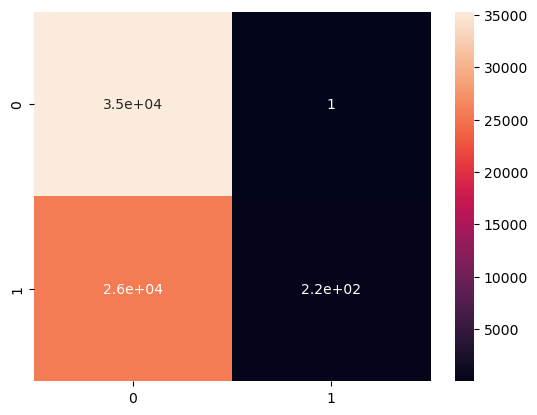

In [61]:
performance(y_train,X_train,gboost_model)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     15066
           1       0.46      0.00      0.01     11120

    accuracy                           0.58     26186
   macro avg       0.52      0.50      0.37     26186
weighted avg       0.53      0.58      0.42     26186

AUC score : 0.5005232403085894


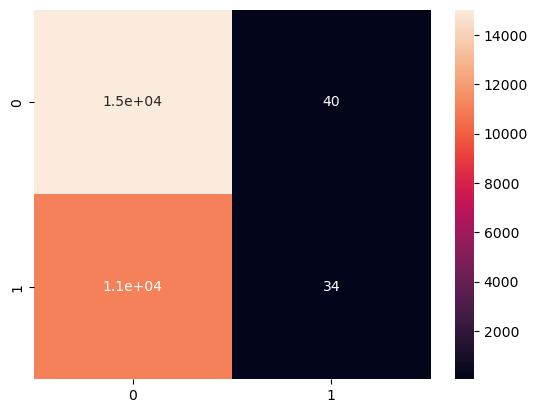

In [62]:
performance(y_test,X_test,gboost_model)

# XGBOOST

In [63]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.60      0.98      0.75     35301
           1       0.82      0.11      0.19     25798

    accuracy                           0.61     61099
   macro avg       0.71      0.55      0.47     61099
weighted avg       0.69      0.61      0.51     61099

AUC score : 0.6645768187085577


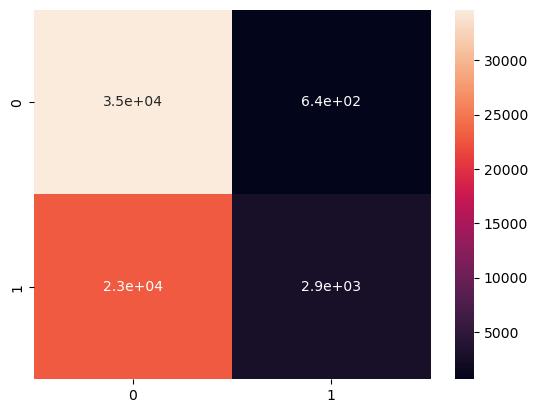

In [64]:
performance(y_train,X_train,xgb_model)

              precision    recall  f1-score   support

           0       0.58      0.95      0.72     15066
           1       0.44      0.06      0.10     11120

    accuracy                           0.57     26186
   macro avg       0.51      0.50      0.41     26186
weighted avg       0.52      0.57      0.46     26186

AUC score : 0.5038686911880292


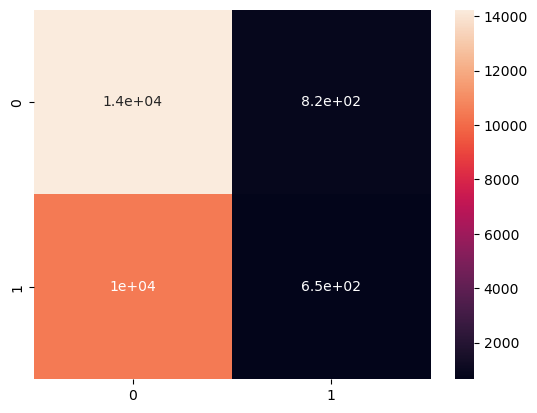

In [65]:
performance(y_test,X_test,xgb_model)

In [66]:
test_data.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,303713,16-25,male,10-19y,high school,middle class,0.424958,1,before 2015,1,0,10238,13000,0,0,0,Sports Car
1,141107,16-25,male,20-29y,high school,working class,0.503478,0,before 2015,1,1,10238,14000,0,0,0,SUV
2,447316,26-39,female,20-29y,high school,upper class,0.252246,1,before 2015,1,0,10238,10000,0,0,0,HatchBack
3,196066,16-25,female,20-29y,university,middle class,0.464749,1,before 2015,1,1,10238,7000,0,1,0,SUV
4,179947,16-25,male,20-29y,high school,working class,0.452968,1,after 2015,0,1,10238,13000,1,0,0,SUV


In [67]:
test_data.shape

(17715, 17)

In [68]:
test_data.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
TYPE_OF_VEHICLE        0
dtype: int64

In [69]:
test_data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000
mean,395583.922382,0.602764,0.823483,0.580073,0.521253,18090.577533,11084.899802,0.657353,0.130229,0.563590
std,279441.633641,0.138770,0.381270,0.493561,0.499562,16632.970988,2949.045183,1.358387,0.590302,1.428455
min,101.000000,0.066880,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000
25%,156427.500000,0.514939,1.000000,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000
50%,359194.000000,0.601685,1.000000,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000
75%,598524.500000,0.703931,1.000000,1.000000,1.000000,26318.000000,13000.000000,1.000000,0.000000,1.000000
max,999976.000000,0.951230,1.000000,1.000000,1.000000,92101.000000,21000.000000,15.000000,6.000000,15.000000


In [70]:
cat_col = []
num_col = []
for i in test_data.columns:
    if test_data[i].dtypes == "object":
        cat_col.append(i)
    else:
        num_col.append(i)

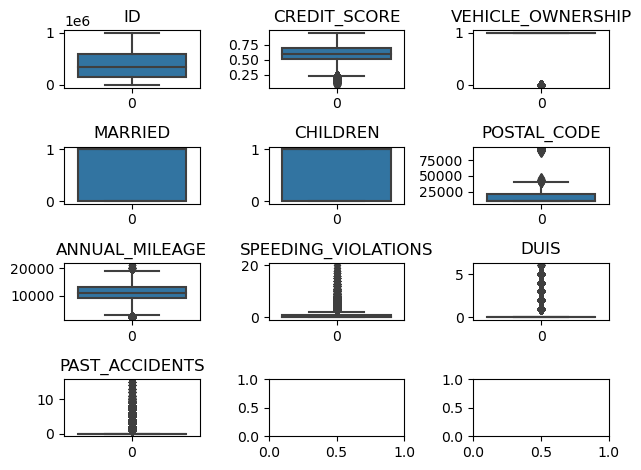

In [71]:
fig, ax = plt.subplots(4,3)
for variable, i in zip(num_col,ax.flatten()):
    boxplot = sns.boxplot(train_data[variable],ax = i)
    boxplot.set_title(variable)
    plt.tight_layout()
plt.show()

<Axes: >

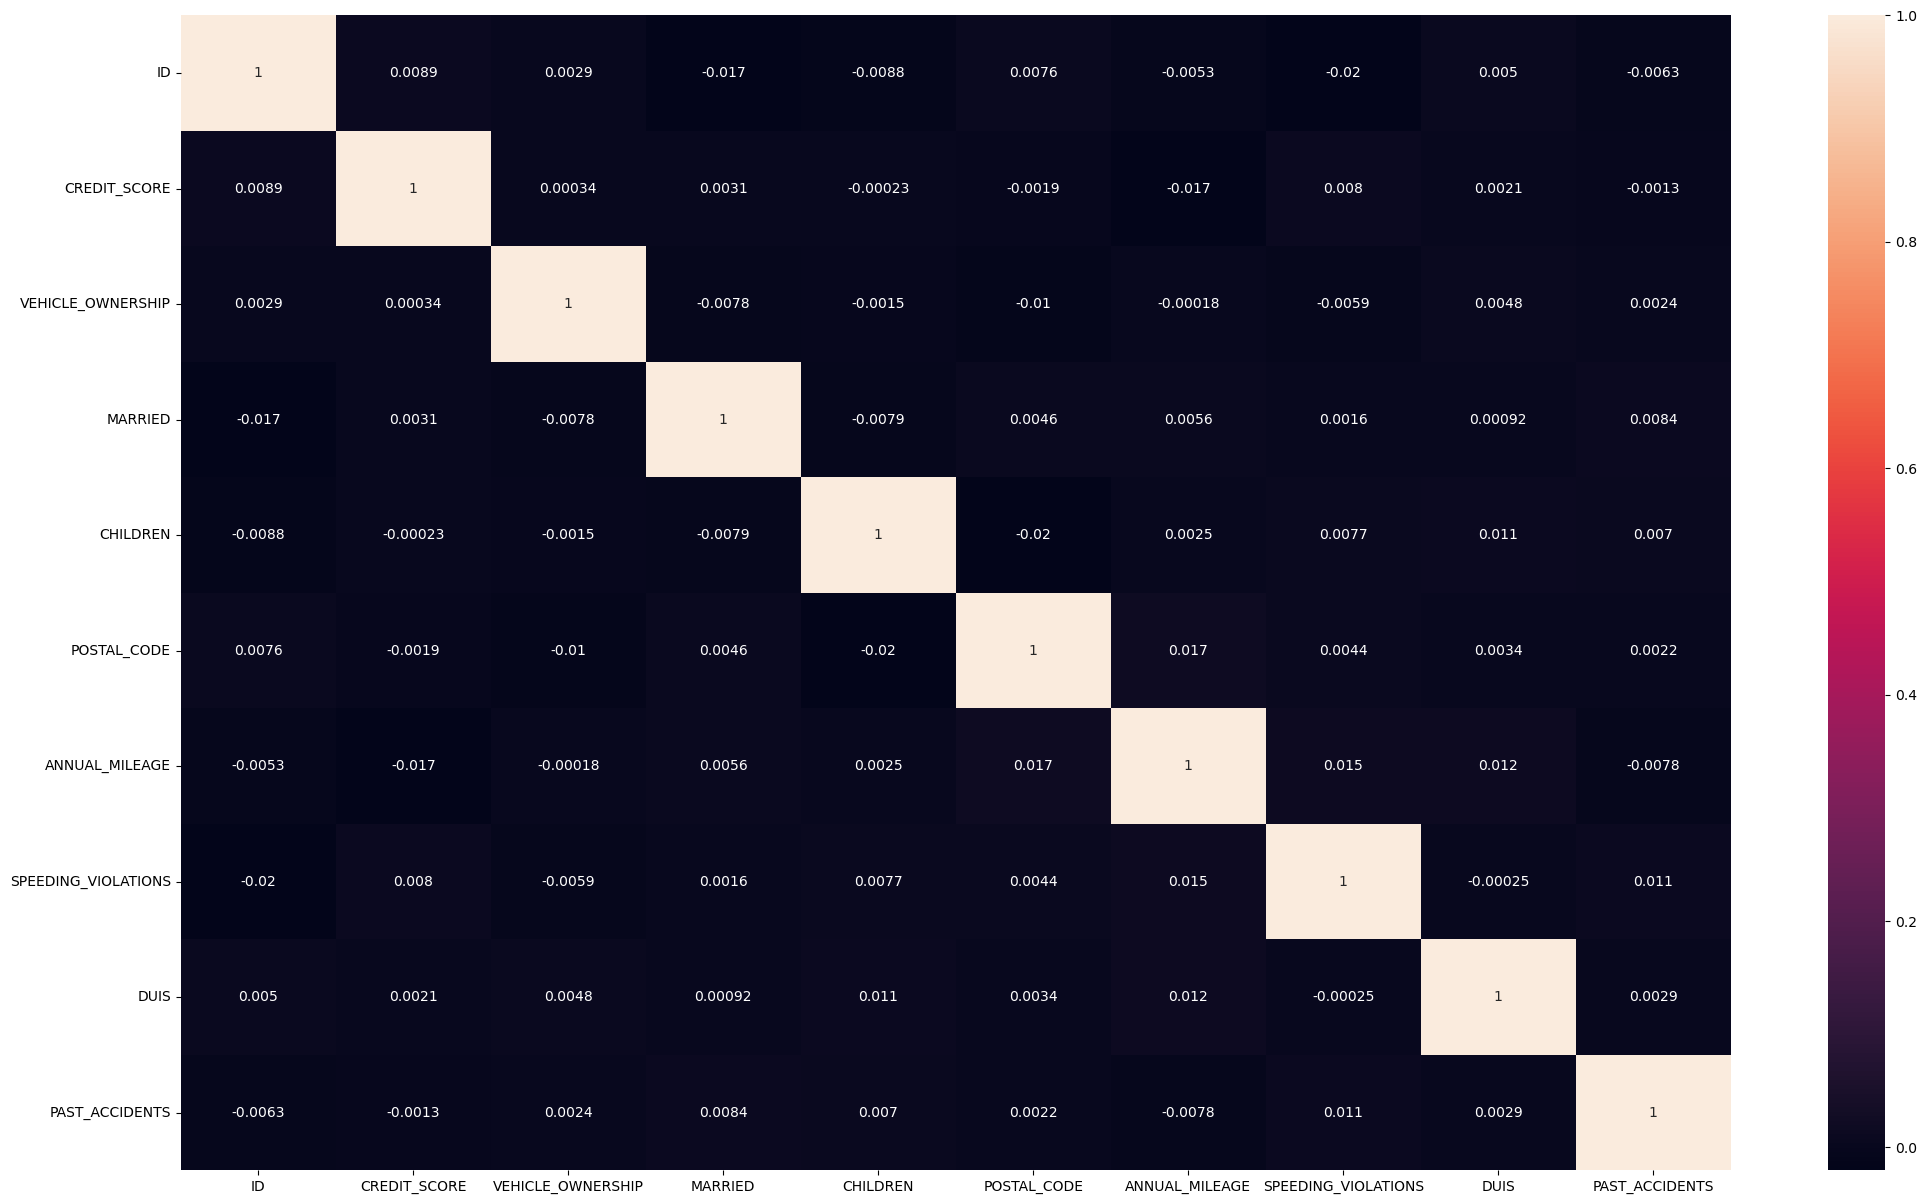

In [72]:
plt.figure(figsize = (25,15))
sns.heatmap(test_data.corr(),annot = True)

In [73]:
dummy = pd.get_dummies(test_data[['AGE','DRIVING_EXPERIENCE','EDUCATION','TYPE_OF_VEHICLE']],drop_first = True)

In [74]:
le = LabelEncoder()
test_data['GENDER'] = le.fit_transform(test_data[['GENDER']])

In [75]:
le = LabelEncoder()
test_data['VEHICLE_YEAR'] = le.fit_transform(test_data[['VEHICLE_YEAR']])

In [76]:
oe = OrdinalEncoder(categories = [["poverty","working class","middle class","upper class"]])
test_data['INCOME'] = oe.fit_transform(test_data[['INCOME']])

In [77]:
final_test_data = pd.concat([test_data[num_col],dummy,test_data[['GENDER','VEHICLE_YEAR','INCOME']]], axis = 1)
final_test_data.head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,...,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car,GENDER,VEHICLE_YEAR,INCOME
0,303713,0.424958,1,1,0,10238,13000,0,0,0,...,0,0,0,0,0,0,1,1,1,2.0
1,141107,0.503478,0,1,1,10238,14000,0,0,0,...,1,0,0,0,1,0,0,1,1,1.0
2,447316,0.252246,1,1,0,10238,10000,0,0,0,...,1,0,0,0,0,0,0,0,1,3.0
3,196066,0.464749,1,1,1,10238,7000,0,1,0,...,1,0,0,1,1,0,0,0,1,2.0
4,179947,0.452968,1,0,1,10238,13000,1,0,0,...,1,0,0,0,1,0,0,1,0,1.0


In [78]:
final_test_data.drop(['ID','POSTAL_CODE'],axis = 1, inplace = True)

In [83]:
gboost_model.predict(final_test_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
test_out = gboost_model.predict(final_test_data)

In [97]:
pd.Series(test_out).to_clipboard()  # copy the output from the data